# Loading Libraries

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Load dataset

In [123]:
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [124]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [157]:
np.random.seed(42)

m = 15000
idx = np.random.permutation(70000)[:m]
X_mix, y_mix = mnist['data'][idx], mnist['target'][idx]

X_train, X_test, y_train, y_test = X_mix[:10000], X_mix[10000:15000], y_mix[:10000], y_mix[10000:15000]
y_train = y_train.astype(np.int8) 
y_test = y_test.astype(np.int8)

# Data visualization

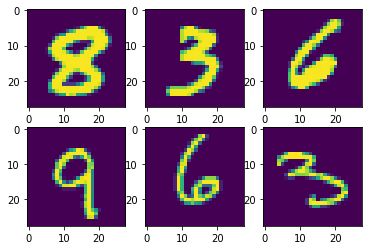

In [158]:
np.random.seed(3)
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols)

for i in range(n_rows):
    for j in range(n_cols):
        random_digit = X_train[np.random.randint(0,10000)]
        random_digit_image = random_digit.reshape(28,28)
        ax[i][j].imshow(random_digit_image, cmap="viridis")

# Data normalization

In [159]:
X_train_norm = X_train/255.0
X_test_norm = X_test/255.0
np.amax(X_train_norm)

1.0

# Create, train a model and check training time

In [130]:
clf = RandomForestClassifier(random_state=42)

def check_training_time(X, y, model):
    start_time = time.time() 
    model.fit(X, y)
    print("Learning time took % seconds " % (time.time() - start_time))

check_training_time(X_train_norm, y_train, clf)

Learning time took 6.599262714385986econds 


That's a really good time for 7 840 000 samples (10 000 x 784) dataset.

# Check model accuracy

In [91]:
def check_accuracy_score_on_test_data(X, y, model):
    y_pred_test = model.predict(X)
    return accuracy_score(y, y_pred_test)
    

check_accuracy_score_on_test_data(X_test_norm, y_test, clf)

0.9442

Wow ! 94% accuracy, RFC made a great job:) Im interested how PCA will affect model accuracy and learning time...

# PCA on dataset and model training

In [131]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_norm)

clf_pca = RandomForestClassifier(random_state=42)

check_training_time(X_reduced, y_train, clf_pca)

Learning time took 13.088865995407104econds 


Learning time trebled...

# Check model accuracy again

In [92]:
X_test_pca = pca.transform(X_test_norm)
check_accuracy_score_on_test_data(X_test_pca, y_test, clf_pca)

0.906

And accuracy is worse than with simple Random Forest Classifier... Let's check another Classifier in combination with PCA

In [86]:
log_clf1 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42, max_iter=2000)
check_training_time(X_train_norm, y_train, log_clf1)

Learning time took 19.477896690368652econds 


In [88]:
X_train_lr = pca.fit_transform(X_train_norm)

log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=2000)
check_training_time(X_train_lr, y_train, log_clf2)

Learning time took 2.7103209495544434econds 


In [89]:
y_pred = log_clf2.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.8958

Learning time for LR with PCA decreased significantly but accuracy is lower than for RF or PCA+RF.

# Let's try another dimensionality reduction alghoritms

In [93]:
rnd_pca = PCA(n_components=150, svd_solver="randomized")
X_reduced_rnd = rnd_pca.fit_transform(X_train)
clf_rnd = RandomForestClassifier(random_state=42)
clf_rnd.fit(X_reduced_rnd, y_train)

X_test_rnd = rnd_pca.transform(X_test)
check_accuracy_score_on_test_data(X_test_rnd, y_test, clf_rnd)

0.91

In [94]:
check_training_time(X_reduced_rnd, y_train, clf_rnd )

Learning time took 13.221781730651855econds 


# Use dimensionality reduction for visualization

In [20]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_mix)
print(X_tsne)

[[ -9.438334    1.7064307]
 [-31.147495   28.585117 ]
 [-48.030552  -17.596146 ]
 ...
 [-11.897807  -42.663235 ]
 [-16.439716  -53.379772 ]
 [-21.428104  -24.003777 ]]


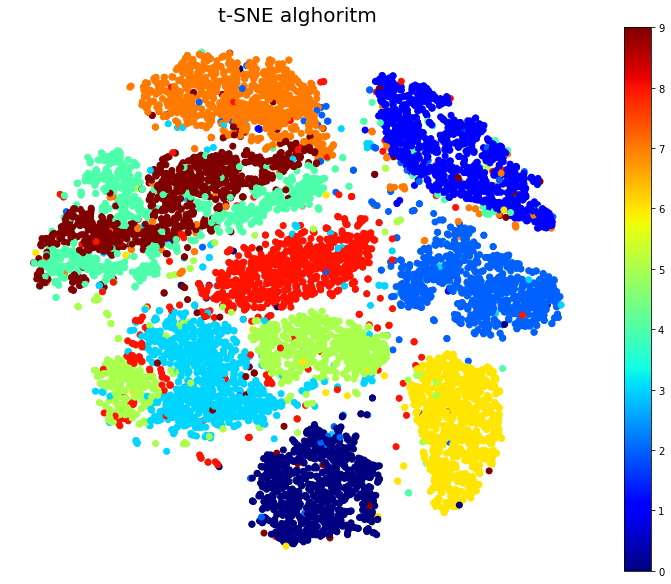

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_mix, marker='o', cmap="jet")
plt.axis('off')
plt.colorbar()
plt.title("t-SNE alghoritm", fontsize=20)
plt.show()
plt.tight_layout()

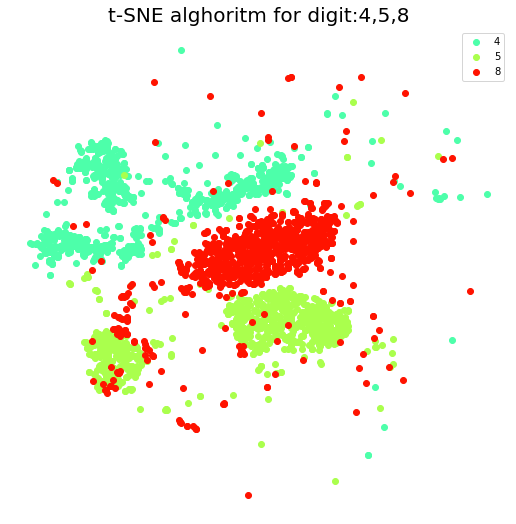

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")

for digit in (4, 5, 8):
    plt.scatter(X_tsne[y_mix == digit, 0], X_tsne[y_mix == digit, 1], color=cmap(digit / 9), label=digit)
    plt.legend()
plt.axis('off')
plt.title("Visualization of 3 digit: 4,5,8", fontsize=20)
plt.show()
plt.tight_layout()

Let's try to use t-SNE only for this 3 digits which are the most scattered.

In [54]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)

In [72]:
y_458_filter = np.isin(y, [4, 5, 8])
y_subset = y[y_458_filter]
X_subset= X[y_458_filter]

[5 4 4 ... 8 4 5]


In [60]:
tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

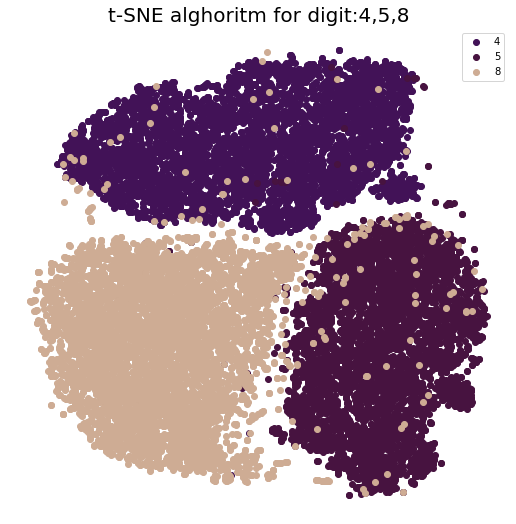

<Figure size 432x288 with 0 Axes>

In [78]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("twilight")
for digit in (4, 5, 8):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], color=cmap(digit / 9), label=digit)
    plt.legend()
plt.axis('off')
plt.title("t-SNE alghoritm for digit:4,5,8", fontsize=20)
plt.show()
plt.tight_layout()

After t-SNE alghoritm only for this 3 digits - 4's and 5's are clustered but some of the 8's are scattered all over the plot.
Let's try to  add some images to the plots to better visualize clusterred digits.

In [113]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    
    X_normalized = MinMaxScaler().fit_transform(X)
    
    neighbors = np.array([[10., 10.]])
    
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], color=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()
    
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

Text(0.5, 1.0, 't-SNE alghoritm')

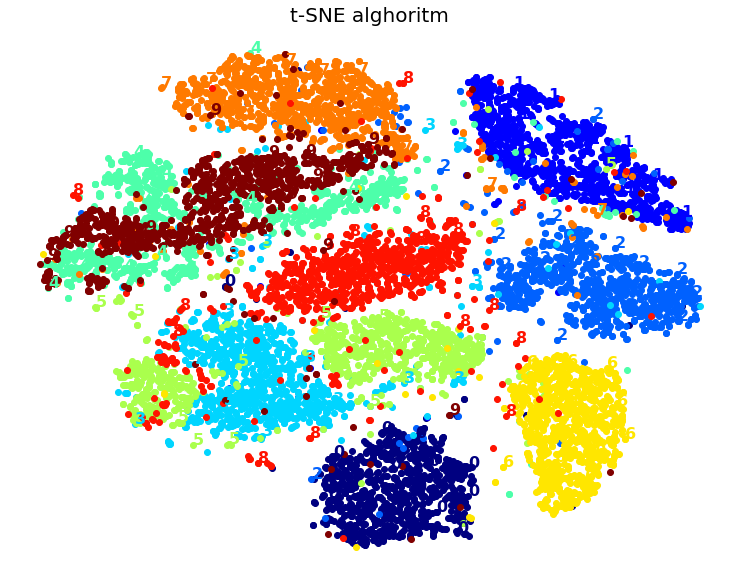

In [145]:
plot_digits(X_tsne, y_mix)
plt.title("t-SNE alghoritm", fontsize=20)

Text(0.5, 1.0, 't-SNE alghoritm')

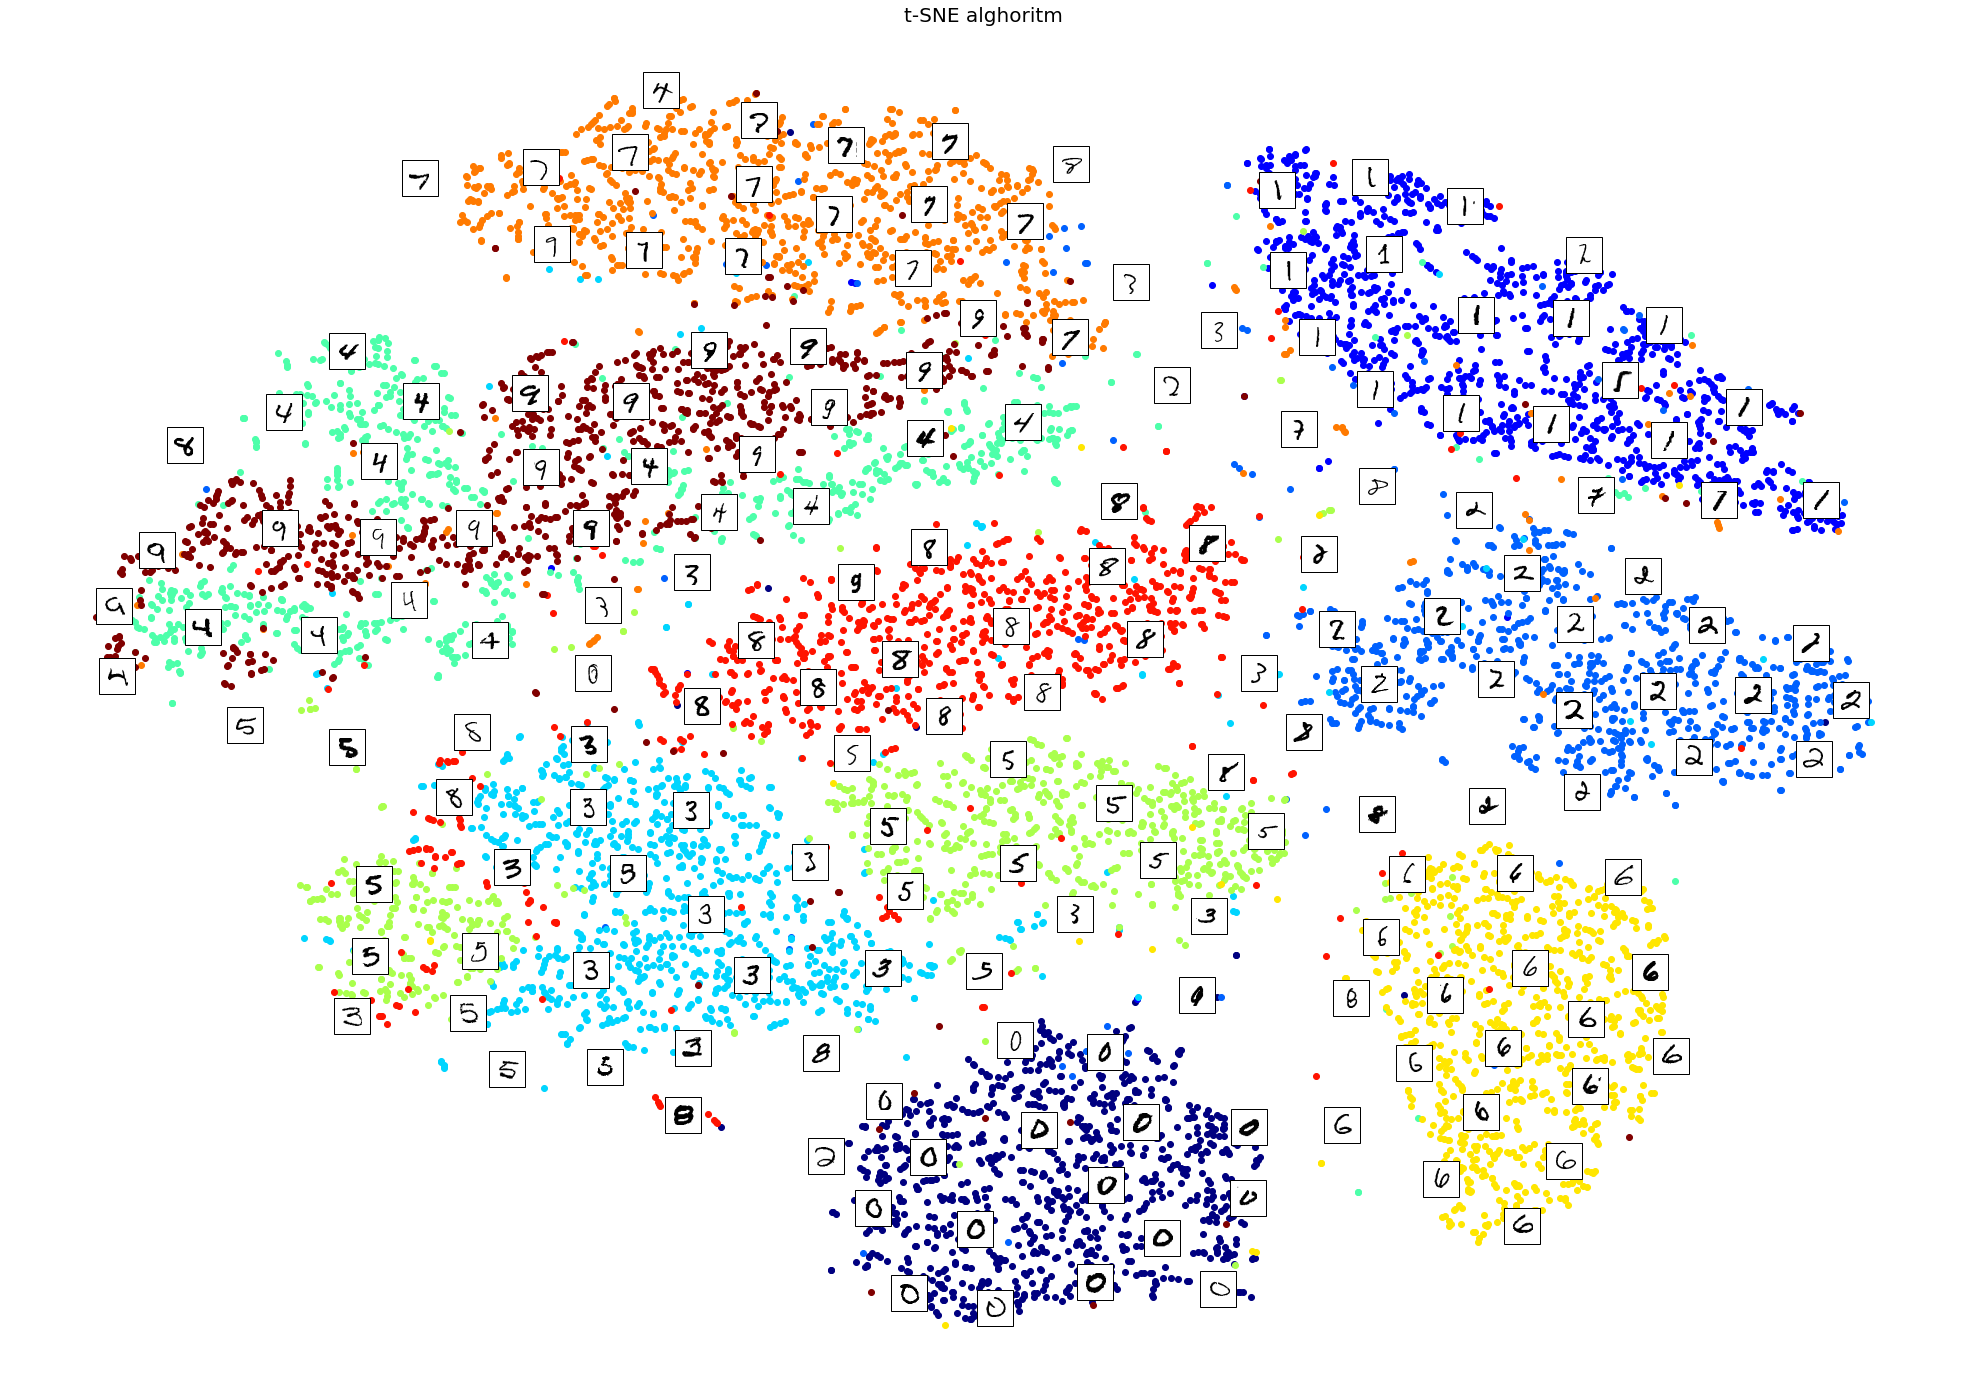

In [151]:
plot_digits(X_tsne, y_mix, images=X_mix, figsize=(35, 25))
plt.title("t-SNE alghoritm", fontsize=20)

Text(0.5, 1.0, 't-SNE alghoritm for digit:4,5,8')

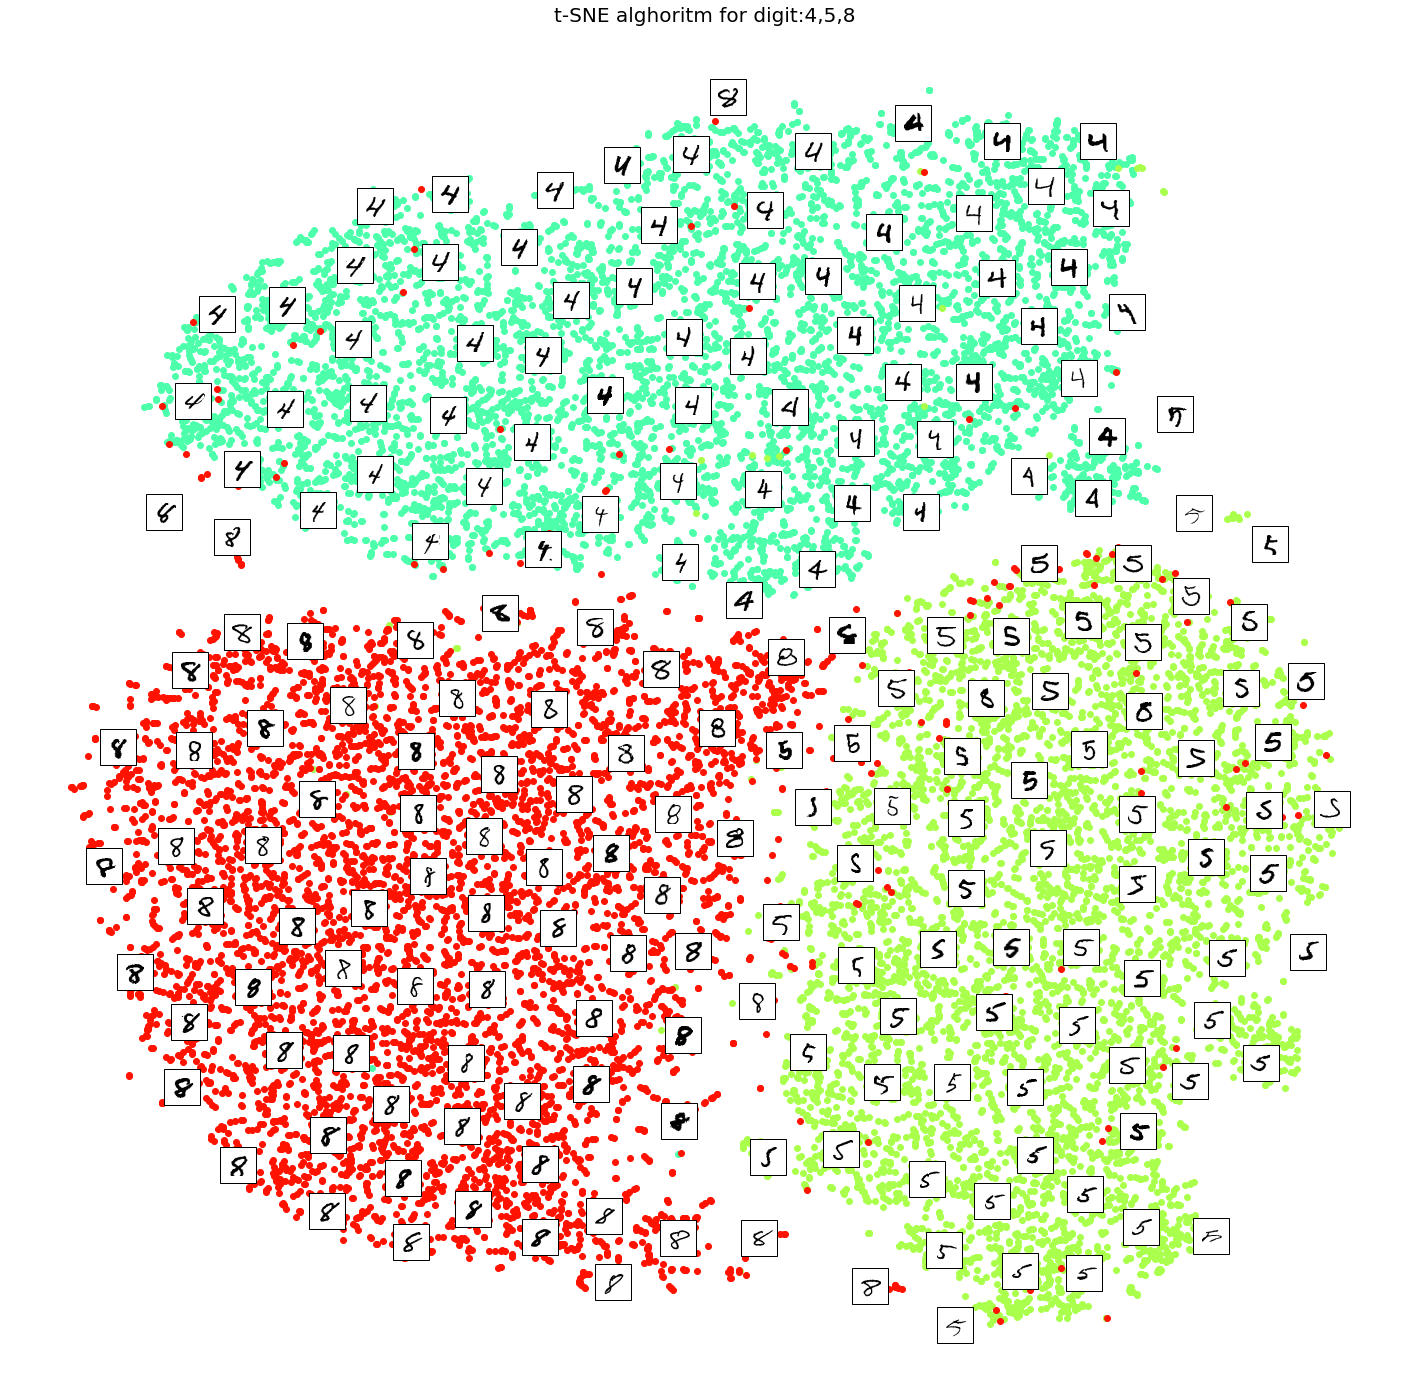

In [147]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(25, 25))
plt.title("t-SNE alghoritm for digit:4,5,8", fontsize=20)

PCA visualization

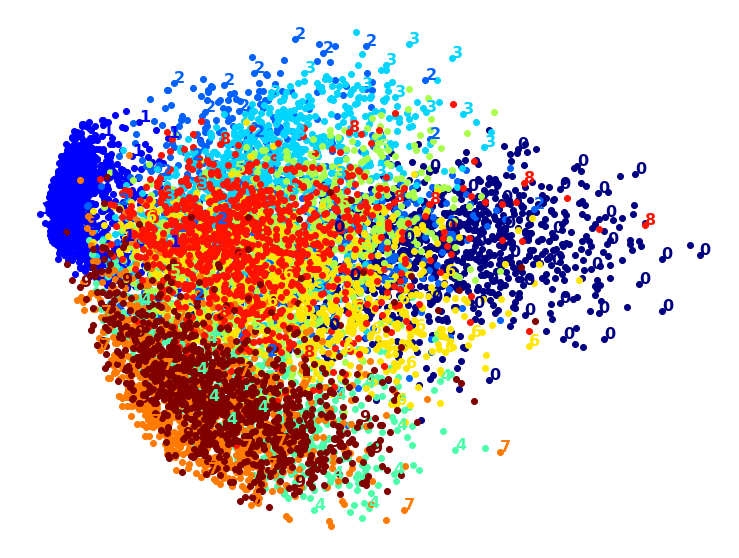

In [160]:
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train)

plot_digits(X_pca_reduced, y_train)

PCA didn't visualize digits properly, we'll try LLE and it's combination with PCA.

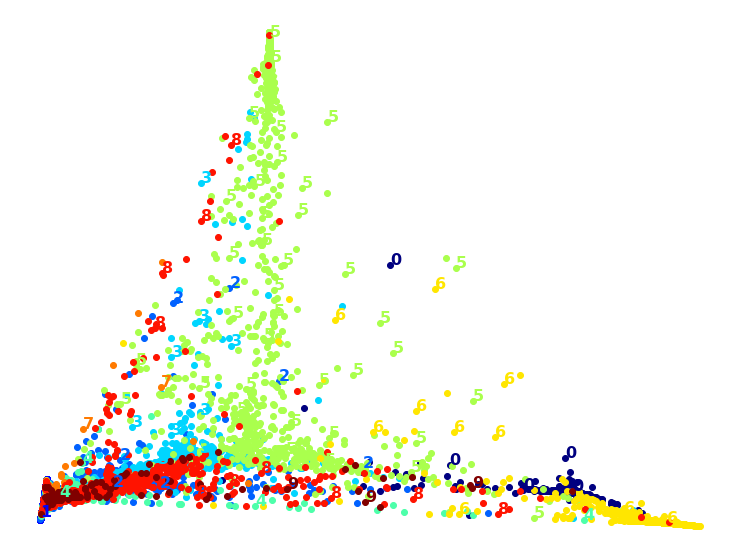

In [135]:
from sklearn.manifold import LocallyLinearEmbedding

X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_train_norm)
plot_digits(X_lle_reduced, y_train)

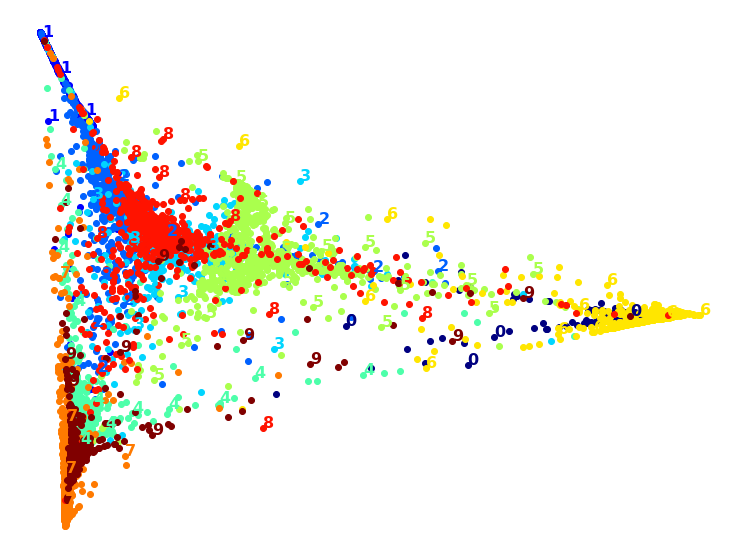

In [136]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])

X_pca_lle_reduced = pca_lle.fit_transform(X_train_norm)
plot_digits(X_pca_lle_reduced, y_train)

Both methods didn't visualize dataset in a clear way... Try to use MDS alghoritm

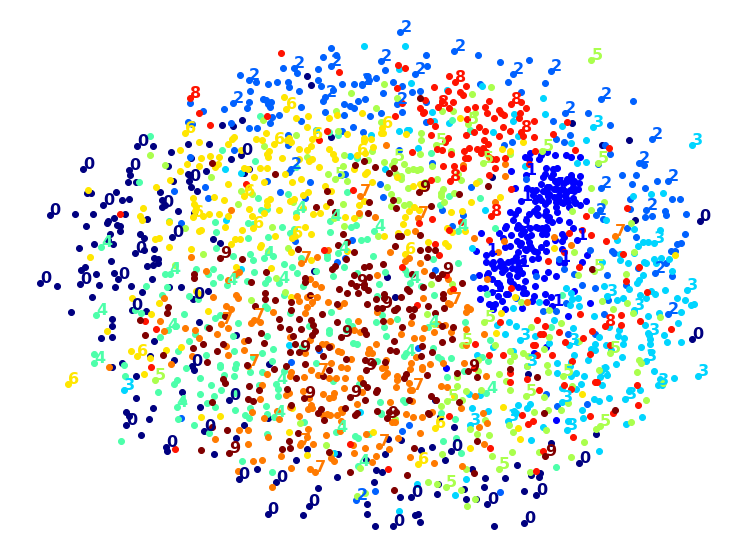

In [138]:
from sklearn.manifold import MDS

X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X_train_norm[:2000])
plot_digits(X_mds_reduced, y_train[:2000])

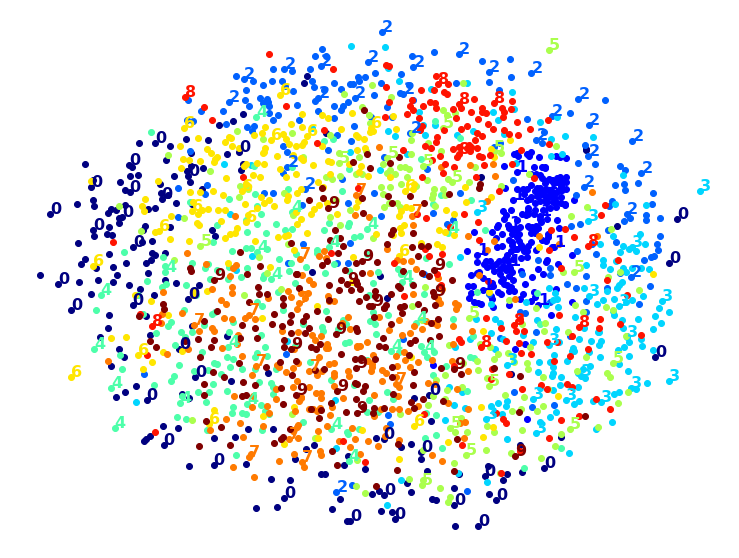

In [141]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])

X_pca_mds_reduced = pca_mds.fit_transform(X_train_norm[:2000])
plot_digits(X_pca_mds_reduced, y_train[:2000])

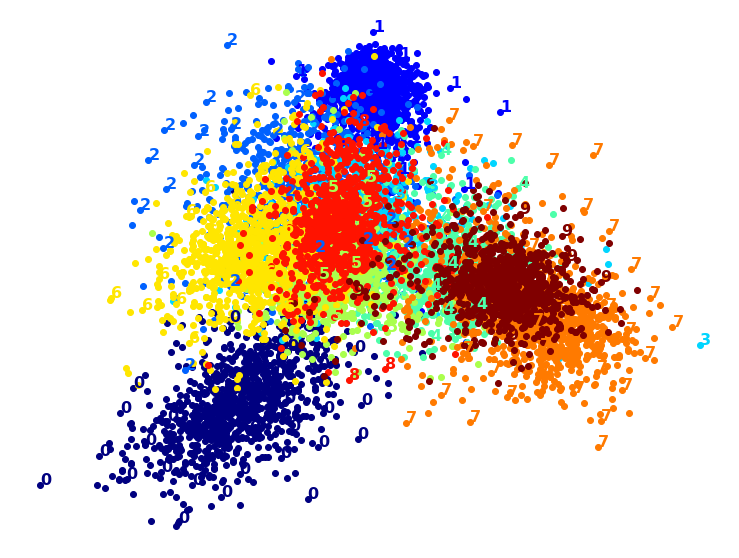

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train_norm, y_train)
plot_digits(X_lda_reduced, y_train)

For data visualization - t-SNE alghoritm works the best, it can be further optimized in case of learning time but generally it visualize reduced dataset in a clearest way.